94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/10
1562/1562 [==============================] - 224s 141ms/step - loss: 2.0863 - accuracy: 0.2315 - val_loss: 1.9133 - val_accuracy: 0.3028
Epoch 2/10
1562/1562 [==============================] - 214s 137ms/step - loss: 1.9378 - accuracy: 0.2887 - val_loss: 1.8618 - val_accuracy: 0.3238
Epoch 3/10
1562/1562 [==============================] - 223s 142ms/step - loss: 1.8871 - accuracy: 0.3110 - val_loss: 1.8155 - val_accuracy: 0.3378
Epoch 4/10
1562/1562 [==============================] - 223s 143ms/step - loss: 1.8560 - accuracy: 0.3250 - val_loss: 1.9544 - val_accuracy: 0.2734
Epoch 5/10
1562/1562 [==============================] - 222s 142ms/step - loss: 1.8463 - accuracy: 0.3274 - val_loss: 1.7689 - val_accuracy: 0.3702
Epoch 6/10
1562/1562 [==============================] - 221s 141ms/step - loss: 1.8273 - accuracy: 0.3391 - val_loss: 1.7718 - val_accuracy: 0.3592
Epoch 7/10
1562/1562 [=========================

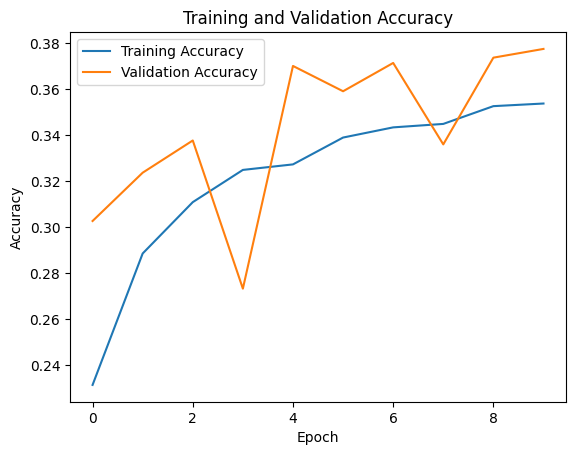

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Create data generators with data augmentation
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen_train.fit(x_train)

# Load the ResNet50 model without the top (classification) layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(256, activation='relu')(x)

# Add the output layer
output = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(datagen_train.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) // 32,
                    epochs=10,
                    validation_data=(x_test, y_test))

# Evaluate the model on the test set
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()